In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('insurance.csv')

In [8]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.90,0.0,yes,southwest,16884.924
1,18.0,male,33.77,1.0,no,Southeast,1725.5523
2,28.0,male,33.00,3.0,no,southeast,$4449.462


In [ ]:
# Clean up the data 

In [9]:
## removing the missing values
df.isna().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [10]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [19]:
## Check duplicates and drop them
df.duplicated().sum()
df.drop_duplicates(inplace= True)

In [20]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.90,0.0,yes,southwest,16884.924
1,18.0,male,33.77,1.0,no,Southeast,1725.5523
2,28.0,male,33.00,3.0,no,southeast,$4449.462


In [26]:
## In charges we need to remove $ sign
df['charges'].str.strip('$')

0         16884.924
1         1725.5523
2          4449.462
3       21984.47061
4         3866.8552
           ...     
1333     10600.5483
1334      2205.9808
1335      1629.8335
1336       2007.945
1337     29141.3603
Name: charges, Length: 1208, dtype: object

In [27]:
df['charges']= df['charges'].str.strip('$')

In [28]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.90,0.0,yes,southwest,16884.924
1,18.0,male,33.77,1.0,no,Southeast,1725.5523
2,28.0,male,33.00,3.0,no,southeast,4449.462


In [29]:
df['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [33]:
## lets make all columns to be lower case
df['region'].str.lower()

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1208, dtype: object

In [34]:
df['region']=df['region'].str.lower()

In [35]:
df['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [38]:
## Make sex columns to have only Male and Female 
D={'female':'Female',
   'male': 'Male',
   'woman':'Female',
   'F':'Female',
   'man':'Male',
   'M':'Male'}
df['sex'].replace(D)

0       Female
1         Male
2         Male
3         Male
4         Male
         ...  
1333      Male
1334    Female
1335    Female
1336    Female
1337    Female
Name: sex, Length: 1208, dtype: object

In [40]:
df['sex']= df['sex'].replace(D)

In [41]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [65]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
145,29.0,Female,38.830,3.0,no,southeast,5138.2567
148,53.0,Female,37.430,1.0,no,northwest,10959.6947
281,54.0,Male,40.565,3.0,yes,northeast,48549.17835
989,24.0,Female,20.520,0.0,yes,northeast,14571.8908
406,33.0,Female,24.310,0.0,no,southeast,4185.0979


In [60]:
## After checking the samplle we see that on age and on children we have negative numbers we need to make them positive 
df['children']=df['children'].abs()

In [66]:
df['age']=df['age'].abs()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [71]:
## We change age to be int, children to be int and charges to be float
df['age'] = df['age'].astype('int64')
df['children'] = df['children'].astype('int64')
df['charges'] = df['charges'].astype('float64')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   int64  
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   int64  
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 75.5+ KB


In [73]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,Female,27.900,0,yes,southwest,16884.92400
1,18,Male,33.770,1,no,southeast,1725.55230
2,28,Male,33.000,3,no,southeast,4449.46200
3,33,Male,22.705,0,no,northwest,21984.47061
4,32,Male,28.880,0,no,northwest,3866.85520


In [77]:
## Change smoker column to Boolean
def func(x):
    if x=='yes':
        return True
    else:
        return False
df['smoker'].apply(func)

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1208, dtype: bool

In [78]:
df['smoker'] = df['smoker'].apply(func)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   int64  
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   int64  
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 67.2+ KB


In [82]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,Female,27.900,0,True,southwest,16884.92400
1,18,Male,33.770,1,False,southeast,1725.55230
2,28,Male,33.000,3,False,southeast,4449.46200
3,33,Male,22.705,0,False,northwest,21984.47061
4,32,Male,28.880,0,False,northwest,3866.85520


<Axes: >

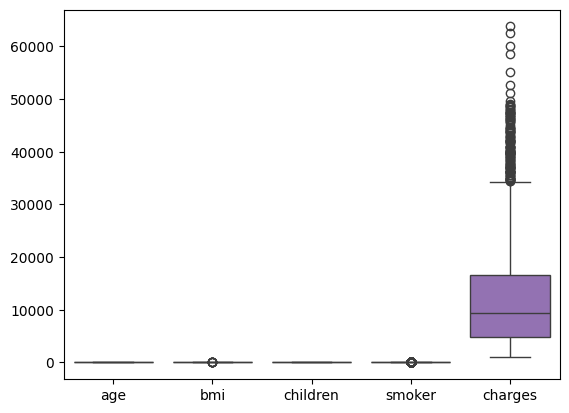

In [83]:
## draw scater plots between variable and charges
import seaborn as sns
sns.boxplot(df)
 

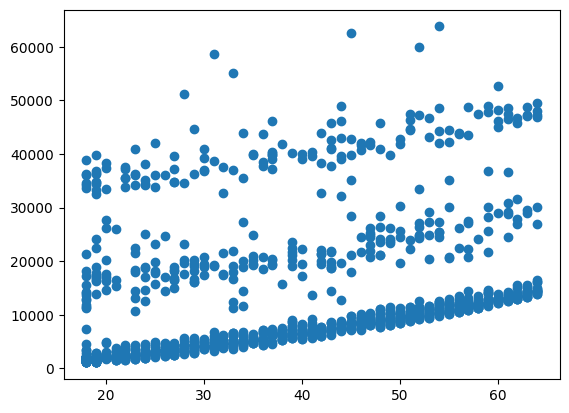

In [87]:
import matplotlib.pyplot as plt

plt.scatter(df['age'],df['charges'])


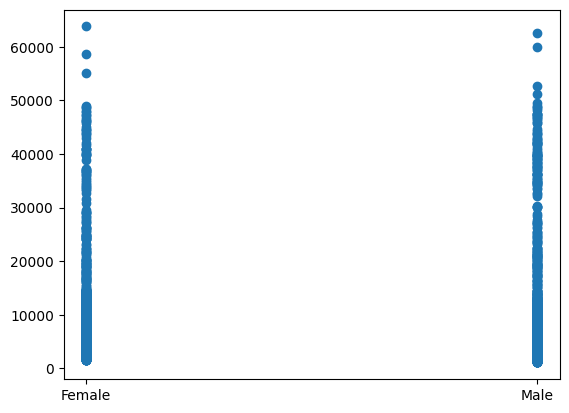

In [88]:
plt.scatter(df['sex'],df['charges'])

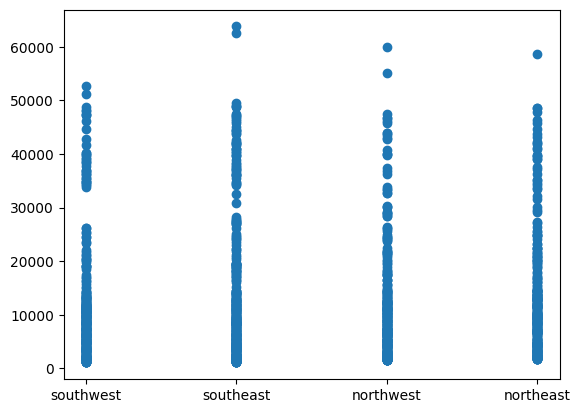

In [89]:
plt.scatter(df['region'],df['charges'])

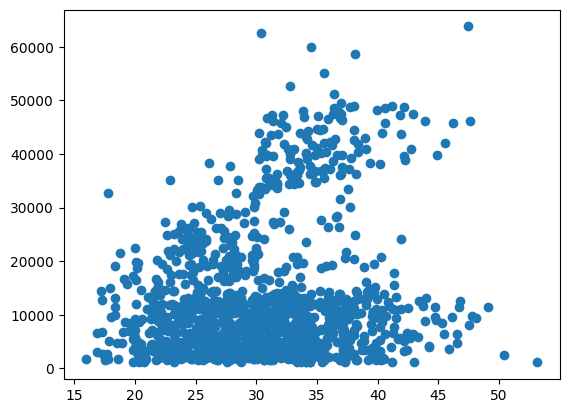

In [90]:
plt.scatter(df['bmi'],df['charges'])

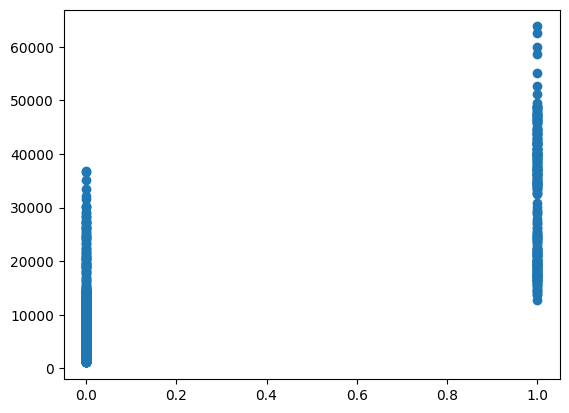

In [91]:
plt.scatter(df['smoker'],df['charges'])

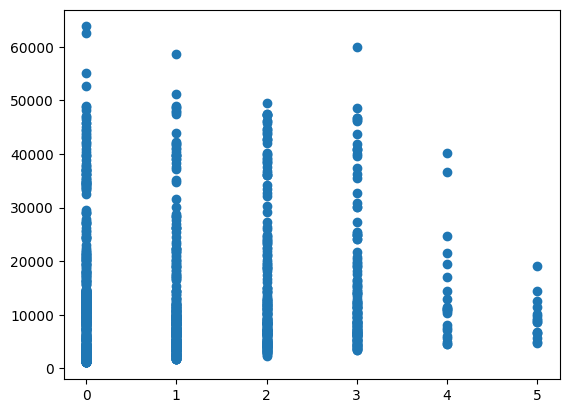

In [92]:
plt.scatter(df['children'],df['charges'])

In [ ]:
### Prepare the data for a model fitting 


In [98]:
df1=pd.get_dummies(df,columns= ['sex','region'])

In [102]:
df1

,age,bmi,children,smoker,charges,sex_Female,sex_Male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,16884.92400,True,False,False,False,False,True
1,18,33.770,1,False,1725.55230,False,True,False,False,True,False
2,28,33.000,3,False,4449.46200,False,True,False,False,True,False
3,33,22.705,0,False,21984.47061,False,True,False,True,False,False
4,32,28.880,0,False,3866.85520,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,10600.54830,False,True,False,True,False,False
1334,18,31.920,0,False,2205.98080,True,False,True,False,False,False
1335,18,36.850,0,False,1629.83350,True,False,False,False,True,False
1336,21,25.800,0,False,2007.94500,True,False,False,False,False,True


In [105]:
df1.applymap(lambda x: int(x) if isinstance(x,bool) else x)

C:\Users\LETSOELASELLO\AppData\Local\Temp\ipykernel_6640\767165610.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1.applymap(lambda x: int(x) if isinstance(x,bool) else x)


,age,bmi,children,smoker,charges,sex_Female,sex_Male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,1,0,0,0,0,1
1,18,33.770,1,0,1725.55230,0,1,0,0,1,0
2,28,33.000,3,0,4449.46200,0,1,0,0,1,0
3,33,22.705,0,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,0,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0,1,0,1,0,0
1334,18,31.920,0,0,2205.98080,1,0,1,0,0,0
1335,18,36.850,0,0,1629.83350,1,0,0,0,1,0
1336,21,25.800,0,0,2007.94500,1,0,0,0,0,1


In [106]:
df = df1.applymap(lambda x: int(x) if isinstance(x,bool) else x)

C:\Users\LETSOELASELLO\AppData\Local\Temp\ipykernel_6640\4278648696.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df1.applymap(lambda x: int(x) if isinstance(x,bool) else x)


In [140]:
df.info()
df= df.dropna()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   int64  
 1   bmi               1207 non-null   float64
 2   children          1207 non-null   int64  
 3   smoker            1207 non-null   int64  
 4   charges           1207 non-null   float64
 5   sex_Female        1207 non-null   int64  
 6   sex_Male          1207 non-null   int64  
 7   region_northeast  1207 non-null   int64  
 8   region_northwest  1207 non-null   int64  
 9   region_southeast  1207 non-null   int64  
 10  region_southwest  1207 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 113.2 KB


In [128]:
## Identify independent and dependent variables
X= df.drop(columns=['charges'])
Y= df['charges']

In [130]:
## divide data into training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)



In [131]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((965, 10), (242, 10), (965,), (242,))

In [132]:
## We create a linear regression model
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [133]:
Y_pred=model.predict(X_test)

In [135]:
Y_pred[:5]

array([ 5097.853302  , 13447.3394699 , 13928.85866339,  2695.87308049,
       14431.77477302])

In [136]:
Y_test[:5]

113      2404.73380
287     14256.19280
1201     8733.22925
122      2257.47525
718     10848.13430
Name: charges, dtype: float64

In [137]:
##Calculate mean_absolute_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,Y_pred)

4378.7235629836805

In [139]:
## Calculate mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred) 

39936613.363110945

In [141]:
## Calculate r2 score
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred) 

0.7049323160872818